In [1]:
"""
Purpose: To Run the proofreading of neurons in the 
test set and measure the precision and recall of the new rules



"""

'\nPurpose: To Run the proofreading of neurons in the \ntest set and measure the precision and recall of the new rules\n\n\n\n'

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

INFO - 2021-04-25 20:44:58,218 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-25 20:44:58,222 - settings - Setting database.user to celiib
INFO - 2021-04-25 20:44:58,223 - settings - Setting database.password to newceliipass
INFO - 2021-04-25 20:44:58,225 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-04-25 20:44:58,225 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-25 20:44:58,245 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-04-25 20:44:58,827 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-25 20:44:58,839 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-25 20:44:58,839 - settings - Setting database.user to celiib
INFO - 2021-04-25 20:44:58,840 - settings - Setting database.password to newceliipass
INFO - 2021-04-25 20:44:58,841 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-25 20:44:58,841 - settings - Setting database.user to celiib
INFO - 2021-04-25 20:44:58,842 - settings - Setting database.password to newceliipass
INFO - 2021-04-25 20:44:58,843 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-25 20:44:59,336 - settings - Setting enable_python_native_blobs to True


In [4]:
#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-04-25 20:44:59,451 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-25 20:44:59,454 - settings - Setting database.user to celiib
INFO - 2021-04-25 20:44:59,456 - settings - Setting database.password to newceliipass
INFO - 2021-04-25 20:44:59,466 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-25 20:45:00,285 - settings - Setting enable_python_native_blobs to True


In [5]:
import validation_utils as vu
import neuron_visualizations as nviz
import neuron_utils as nru
import proofreading_utils as pru
import time
import system_utils as su

# Runnig the validation

In [6]:
"""
Psueodocode: 
1) Pull down the segment ids of the valid neurons

For each neuron
1) Dwonload the neuron object
2) Run the Proofreading
3) Print out the validation plot
4) Save the validation df

"""

'\nPsueodocode: \n1) Pull down the segment ids of the valid neurons\n\nFor each neuron\n1) Dwonload the neuron object\n2) Run the Proofreading\n3) Print out the validation plot\n4) Save the validation df\n\n'

In [7]:
segment_ids = minnie.AutoProofreadValidationBorderNeurons().fetch("segment_id")

In [8]:
job_idx = 9
job_step = 5
segments_to_process = segment_ids[job_idx*job_step:(job_idx+1)*job_step]
segments_to_process

array([864691135974454895, 864691136201041854, 864691135785277636,
       864691136550489250, 864691135348272855])


--- Working on Neuron 864691135974454895 --
Decompressing Neuron in minimal output mode...please wait
For presyn: # valid synapses = 291, # error synapses  = 0, # error presyns = 0
For postsyn: # valid synapses = 4341, # error synapses  = 1, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 4633
n_valid_syn_ids_presyn = 291
n_errored_syn_ids_presyn = 0
n_valid_syn_ids_postsyn = 4341
n_errored_syn_ids_postsyn = 1
Segment Id = 864691135974454895
Postsyn counts:
TP:4341
TN:0
FP:0
FN:1
Presyn counts:
TP:154
TN:0
FP:137
FN:0


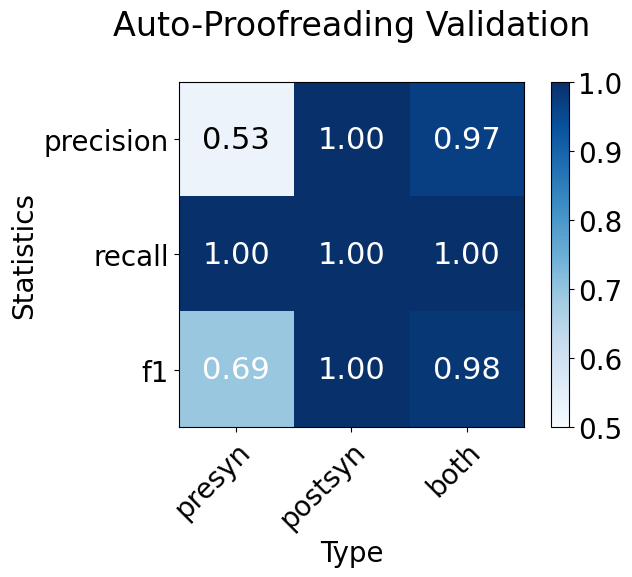

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/baseline_data/864691135974454895_validation_df.pbz2
File size is 0.093578 MB
Total time for neuron 864691135974454895: 131.08313250541687

--- Working on Neuron 864691136201041854 --
Decompressing Neuron in minimal output mode...please wait
For presyn: # valid synapses = 64, # error synapses  = 0, # error presyns = 0
For postsyn: # valid synapses = 4642, # error synapses  = 0, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 4706
n_valid_syn_ids_presyn = 64
n_errored_syn_ids_presyn = 0
n_valid_syn_ids_postsyn = 4642
n_errored_syn_ids_postsyn = 0
Segment Id = 864691136201041854
Postsyn counts:
TP:4638
TN:0
FP:4
FN:0
Presyn counts:
TP:23
TN:0
FP:41
FN:0


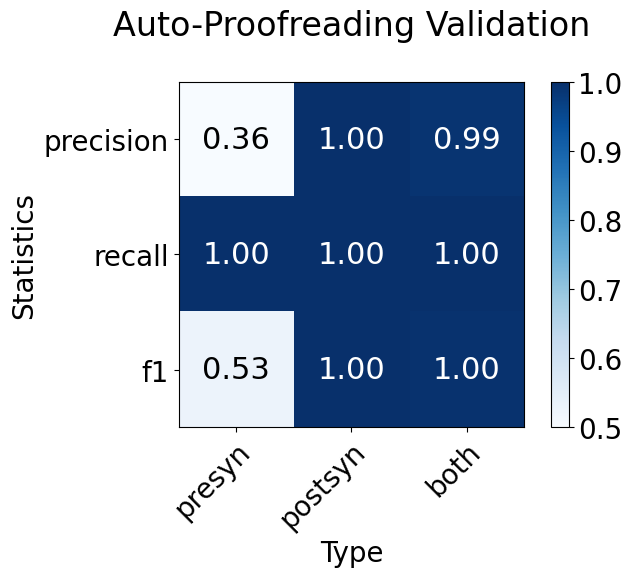

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/baseline_data/864691136201041854_validation_df.pbz2
File size is 0.094234 MB
Total time for neuron 864691136201041854: 94.19759774208069

--- Working on Neuron 864691135785277636 --
Decompressing Neuron in minimal output mode...please wait
For presyn: # valid synapses = 157, # error synapses  = 3, # error presyns = 0
For postsyn: # valid synapses = 6851, # error synapses  = 99, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 7110
n_valid_syn_ids_presyn = 157
n_errored_syn_ids_presyn = 3
n_valid_syn_ids_postsyn = 6851
n_errored_syn_ids_postsyn = 99
Segment Id = 864691135785277636
Postsyn counts:
TP:6826
TN:0
FP:25
FN:99
Presyn counts:
TP:50
TN:1
FP:107
FN:2


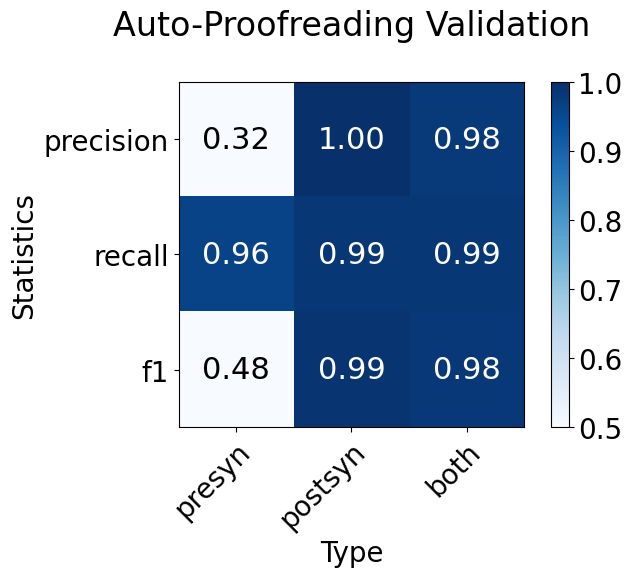

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/baseline_data/864691135785277636_validation_df.pbz2
File size is 0.141424 MB
Total time for neuron 864691135785277636: 115.01625967025757

--- Working on Neuron 864691136550489250 --
Decompressing Neuron in minimal output mode...please wait
For presyn: # valid synapses = 46, # error synapses  = 0, # error presyns = 0
For postsyn: # valid synapses = 2464, # error synapses  = 0, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 2510
n_valid_syn_ids_presyn = 46
n_errored_syn_ids_presyn = 0
n_valid_syn_ids_postsyn = 2464
n_errored_syn_ids_postsyn = 0
Segment Id = 864691136550489250
Postsyn counts:
TP:2463
TN:0
FP:1
FN:0
Presyn counts:
TP:30
TN:0
FP:16
FN:0


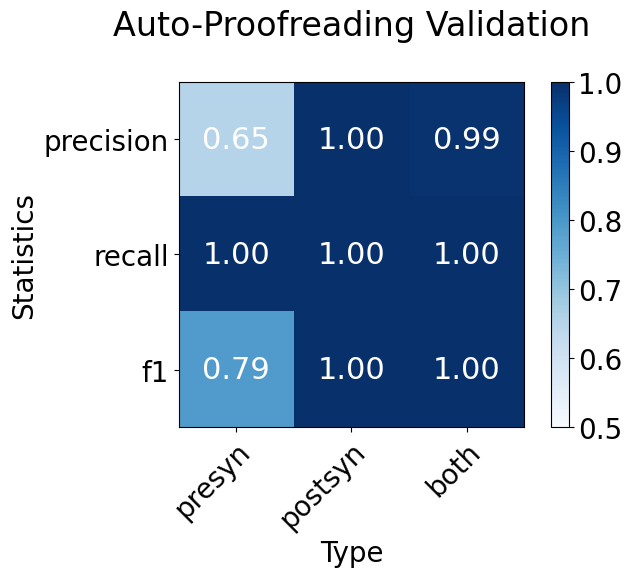

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/baseline_data/864691136550489250_validation_df.pbz2
File size is 0.051044 MB
Total time for neuron 864691136550489250: 37.961134910583496

--- Working on Neuron 864691135348272855 --
Decompressing Neuron in minimal output mode...please wait
For presyn: # valid synapses = 451, # error synapses  = 0, # error presyns = 0
For postsyn: # valid synapses = 6023, # error synapses  = 0, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 6474
n_valid_syn_ids_presyn = 451
n_errored_syn_ids_presyn = 0
n_valid_syn_ids_postsyn = 6023
n_errored_syn_ids_postsyn = 0
Segment Id = 864691135348272855
Postsyn counts:
TP:6013
TN:0
FP:10
FN:0
Presyn counts:
TP:59
TN:0
FP:392
FN:0


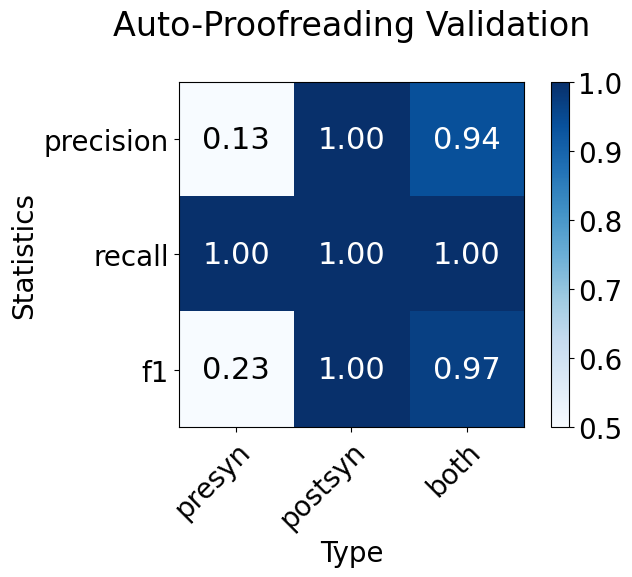

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/baseline_data/864691135348272855_validation_df.pbz2
File size is 0.129156 MB
Total time for neuron 864691135348272855: 89.79895424842834


In [9]:
for seg_id in segments_to_process:
    print(f"\n--- Working on Neuron {seg_id} --")
    st = time.time()
    
    
    #1) Dwonload the neuron object
    neuron_obj = du.fetch_neuron_obj_manual(seg_id,
                                       border_validation=True)
    
    (filt_neuron,
     return_synapse_df_revised,
    return_validation_df_revised) =  vu.filtered_neuron_score(neuron_obj = neuron_obj,   
                        filter_list = [],
                        plot_limb_branch_filter_with_disconnect_effect = False,
                        verbose = False,
                        plot_score=False,
                                                             apply_non_axon_presyn_errors = False)
    
    vu.synapse_validation_df_to_score_plot(return_validation_df_revised)
    
    su.compressed_pickle(return_validation_df_revised,f"./baseline_data/{seg_id}_validation_df")
    
    print(f"Total time for neuron {seg_id}: {time.time() - st}")